In [2]:
# importing the necessary packages
import numpy as np # working with arrays
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.naive_bayes import GaussianNB # Naive Bayesian algorithm

from sklearn.metrics import classification_report, accuracy_score # evaluation metric
from sklearn.metrics import precision_score, recall_score # evaluation metric
from sklearn.metrics import f1_score, matthews_corrcoef # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric

# importing the dataset
# Load the dataset from the csv file using pandas
# copy the path for the csv file
data = pd.read_csv(r"C:\Users\Sindhu Sai\Downloads\archive\creditcard.csv")

# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

In [4]:
# Data Processing
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [5]:
print('Amount details of the fraudulent transactions')
fraud.Amount.describe()

Amount details of the fraudulent transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [6]:
print('Amount details of valid transactions')
valid.Amount.describe()

Amount details of valid transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
# Data Normalization

sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
print((data['Amount'].head(10)))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


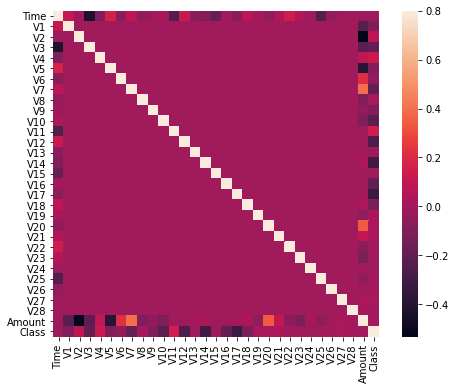

In [8]:
# Correlation matrix

corrmat = data.corr()
fig = plt.figure(figsize = (8,6))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [9]:
# Data Split
# Using Skicit-learn we split data into training and testing sets

x = data.drop('Class', axis = 1).values
y = data['Class'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Random Forest (RF) Classifier

In [10]:
# Building the Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
# predictions
rfc_pred = rfc.predict(x_test)

In [11]:
# Evaluating the classifier
# printing every score of the classifier

n_outliers = len(fraud)
n_errors = (rfc_pred != y_test).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(y_test,rfc_pred)
print("The Accuracy is {}".format(acc))

prec = precision_score(y_test,rfc_pred)
print("The Precision is {}".format(prec))

rec = recall_score(y_test,rfc_pred)
print("The Recall is {}".format(rec))

f1 = f1_score(y_test,rfc_pred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test,rfc_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random Forest classifier
The Accuracy is 0.9995962220427653
The Precision is 0.987012987012987
The Recall is 0.7755102040816326
The F1-Score is 0.8685714285714285
The Matthews correlation coefficient is 0.8747121626683524


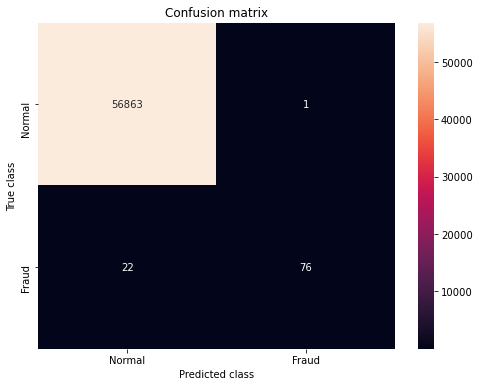

In [12]:
# printing the confusion matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test,rfc_pred)
plt.figure(figsize =(8, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Logical Regression (LR) Classifier

In [14]:
# Building the Logistic Regression Classifier

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [15]:
# Evaluating the classifier
# printing every score of the classifier

n_outliers = len(fraud)
n_errors = (lr_pred != y_test).sum()
print("The model used is Logistic Regression classifier")

acc = accuracy_score(y_test,lr_pred)
print("The Accuracy is {}".format(acc))

prec = precision_score(y_test,lr_pred)
print("The Precision is {}".format(prec))

rec = recall_score(y_test,lr_pred)
print("The Recall is {}".format(rec))

f1 = f1_score(y_test,lr_pred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test,lr_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Logistic Regression classifier
The Accuracy is 0.9989642217618764
The Precision is 0.8305084745762712
The Recall is 0.5
The F1-Score is 0.6242038216560509
The Matthews correlation coefficient is 0.6439547963503633


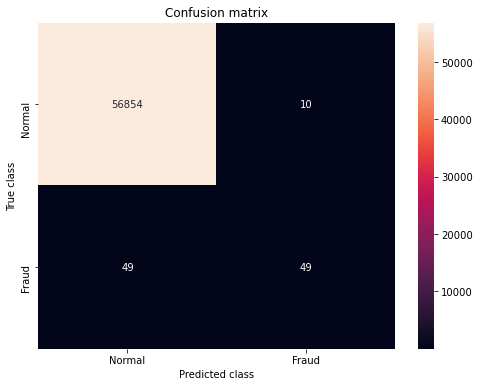

In [16]:
# printing the confusion matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test,lr_pred)
plt.figure(figsize =(8, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Naive Bayesian (NB) Classifier

In [17]:
# Building the Naive Bayesian Classifier

nbc = GaussianNB()
nbc.fit(x_train, y_train)
# predictions
nbc_pred = nbc.predict(x_test)

In [18]:
# Evaluating the classifier
# printing every score of the classifier

n_outliers = len(fraud)
n_errors = (nbc_pred != y_test).sum()
print("The model used is Naive Bayesian classifier")

acc = accuracy_score(y_test,nbc_pred)
print("The Accuracy is {}".format(acc))

prec = precision_score(y_test,lr_pred)
print("The Precision is {}".format(prec))

rec = recall_score(y_test,nbc_pred)
print("The Recall is {}".format(rec))

f1 = f1_score(y_test,nbc_pred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test,nbc_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Naive Bayesian classifier
The Accuracy is 0.9928022190232084
The Precision is 0.8305084745762712
The Recall is 0.6326530612244898
The F1-Score is 0.23220973782771537
The Matthews correlation coefficient is 0.2977086139394879


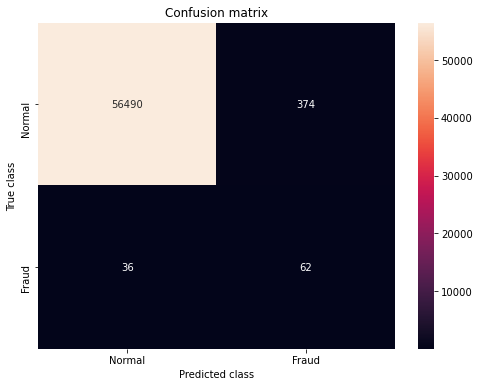

In [19]:
# printing the confusion matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test,nbc_pred)
plt.figure(figsize =(8, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()